In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats
from matplotlib.pyplot import plot
import pylab
import statsmodels.api as sm
import statsmodels.stats.api as sms
from scipy.stats import shapiro

In [7]:
data = pd.read_csv("hmelq.csv")
data.head()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,0,81200,18834.0,108355.0,HomeImp,NaN,28.0,0.0,0.0,139.14,0.0,14.0,34.042
1,0,12600,103960.0,127384.0,DebtCon,NaN,2.0,0.0,0.0,129.02,0.0,25.0,34.479
2,0,18000,46865.0,61266.0,DebtCon,NaN,5.0,0.0,0.0,102.59,2.0,9.0,26.354
3,0,10300,57676.0,71027.0,DebtCon,NaN,19.0,0.0,0.0,157.52,1.0,11.0,33.992
4,0,9400,56508.0,78358.0,DebtCon,NaN,17.0,0.0,0.0,141.93,0.0,11.0,32.327


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2018 entries, 153 to 3549
Data columns (total 13 columns):
bad        2018 non-null int64
loan       2018 non-null int64
mortdue    2018 non-null float64
value      2018 non-null float64
reason     2018 non-null object
job        2018 non-null object
yoj        2018 non-null float64
derog      2018 non-null float64
delinq     2018 non-null float64
clage      2018 non-null float64
ninq       2018 non-null float64
clno       2018 non-null float64
debtinc    2018 non-null float64
dtypes: float64(9), int64(2), object(2)
memory usage: 220.7+ KB


In [8]:
data.dropna(inplace=True)
data.describe()

,bad,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc
count,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000
mean,0.088206,19010.257681,76337.035183,106899.244797,9.003964,0.150149,0.264123,180.645020,1.037661,22.265114,34.105829
std,0.283665,10768.607345,44476.368189,54026.707096,7.573012,0.580421,0.789816,84.420116,1.578414,9.457238,8.438411
min,0.000000,1700.000000,5076.000000,23031.000000,0.000000,0.000000,0.000000,0.490000,0.000000,0.000000,4.030000
25%,0.000000,12000.000000,49577.250000,71287.250000,3.000000,0.000000,0.000000,118.205000,0.000000,16.000000,29.295500
50%,0.000000,16900.000000,67595.000000,94514.000000,7.000000,0.000000,0.000000,176.670000,0.000000,21.000000,34.949000
75%,0.000000,23600.000000,92922.750000,121220.750000,13.000000,0.000000,0.000000,229.692500,2.000000,27.000000,38.952000
max,1.000000,89900.000000,399412.000000,512650.000000,41.000000,10.000000,10.000000,1168.230000,13.000000,64.000000,144.189000


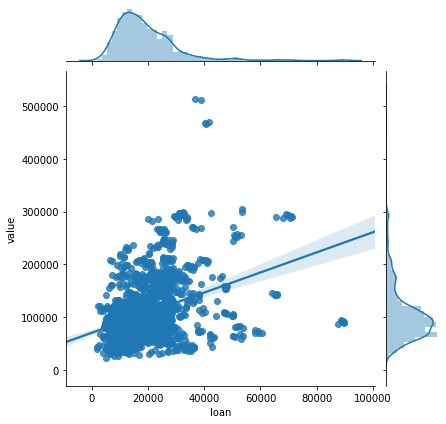

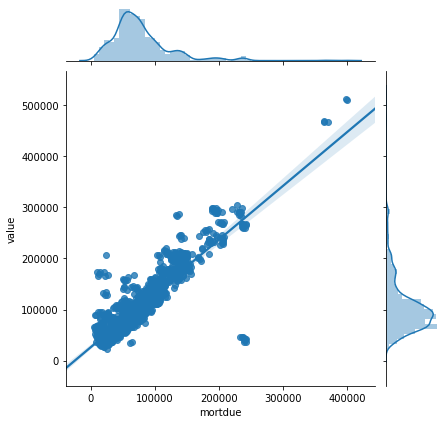

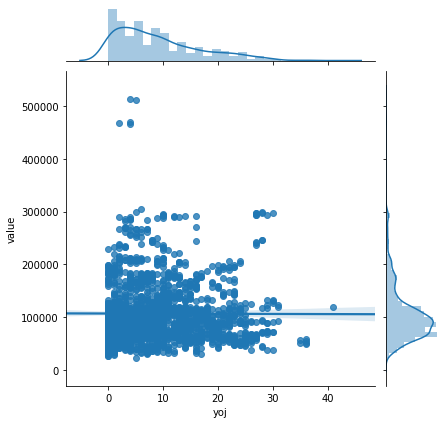

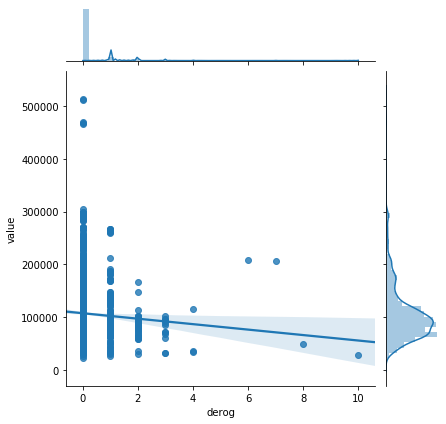

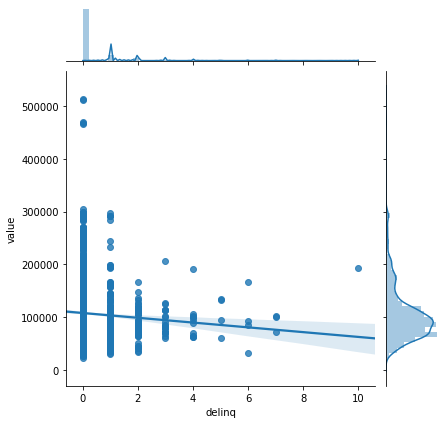

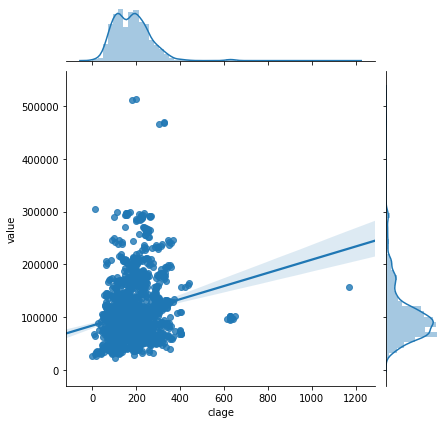

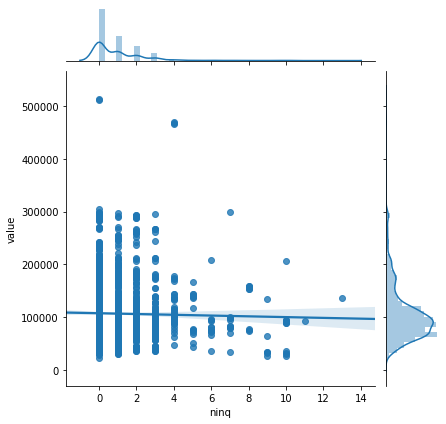

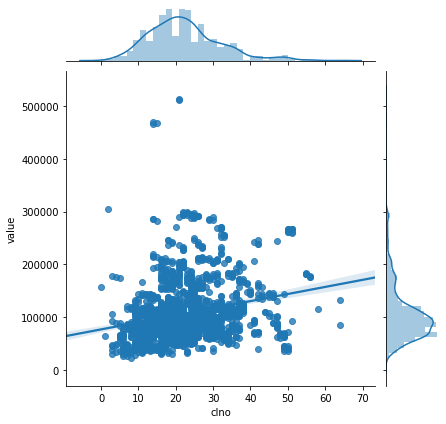

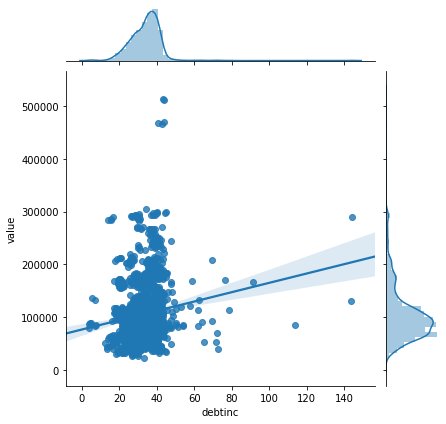

In [18]:
# pair graph of the columns to see the relation with 'value'
cols = data.columns.drop(['bad','value', 'reason', 'job'])
for col_name in cols:
    f= sns.jointplot(x=col_name, y ='value', data = data, kind ='reg')

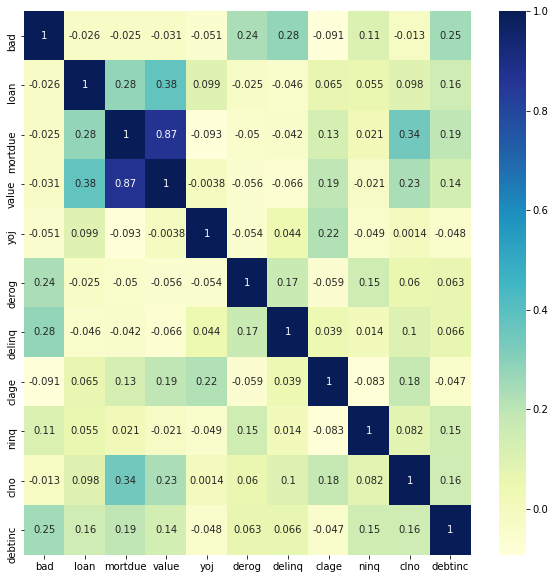

In [20]:
corr = data.corr()
plt.figure(figsize = (10,10))
sns.heatmap(corr, annot = True,cmap="YlGnBu")
# (value, mortdue) pair seems correlated

In [23]:
# splitting the data as train and test
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X = data.drop(['bad','value', 'reason', 'job'], axis=1)
y = data["value"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)
X_train.shape, y_train.shape

((1614, 9), (1614,))

In [35]:
# linear regression
lm = sm.OLS(y_train, X_train)
model = lm.fit()
model.summary()
# 'derog' seems unrelated with the value since its p value = 0.054 is greater than alpha = 0.05
# r-squared value is very high. There is a possibility of having dependent variables.

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  value   R-squared (uncentered):                   0.955
Model:                            OLS   Adj. R-squared (uncentered):              0.955
Method:                 Least Squares   F-statistic:                              3787.
Date:                Sun, 15 Sep 2019   Prob (F-statistic):                        0.00
Time:                        16:27:34   Log-Likelihood:                         -18654.
No. Observations:                1614   AIC:                                  3.733e+04
Df Residuals:                    1605   BIC:                                  3.737e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
loan           0.7422      0.061     12.227      0.000       0.623       0.861
mortdue        1.0465      0.016     64.977      0.000       1.015       1.078
yoj          438.5693     85.417      5.134      0.000     271.029     606.109
derog       2342.3384   1213.920      1.930      0.054     -38.697    4723.374
delinq     -1983.1641    807.823     -2.455      0.014   -3567.663    -398.665
clage         65.0070      7.395      8.791      0.000      50.502      79.512
ninq        -853.1230    391.234     -2.181      0.029   -1620.507     -85.739
clno        -355.2160     70.163     -5.063      0.000    -492.836    -217.596
debtinc      156.0544     54.740      2.851      0.004      48.686     263.423
==============================================================================
Omnibus:                     1199.987   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            97105.903
Skew:                          -2.783   Prob(JB):                         0.00
Kurtosis:                      40.590   Cond. No.                     1.75e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.75e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
# comparing the mean squared errors
from sklearn.metrics import mean_squared_error, r2_score
rmse = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))
print('training mean squarred error : ', rmse)
testrmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
print('test mean squarred error : ', testrmse)
# they are very close to each other which shows that my model is good

training mean squarred error :  25301.999130465312
test mean squarred error :  24687.134700368577


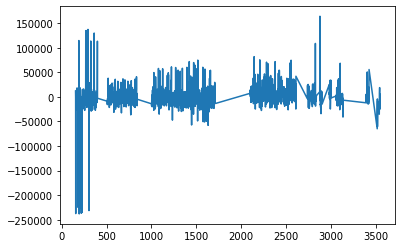

In [48]:
# plotting the graph of resids
model.resid[0:10]
resid = model.resid.sort_index()
plt. plot(resid)
# some outliers are exist according to graph

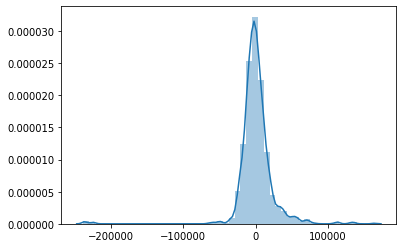

In [75]:
sns.distplot(resid)

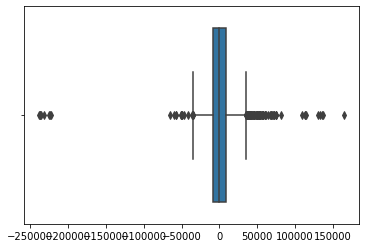

In [76]:
sns.boxplot(resid)